# Лабораторная работа №3 по вычислительной математике

## Применение метода простой итерации и метода Ньютона для решения нелинейных уравнений и систем нелинейных уравнений

### Выполнил Филиппенко Павел -- студент группы Б01-009

#### Задание II.12.4 вариант и)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import scipy.optimize

Зададим нелинейное уравнение, с которым мы будем работать

In [17]:
def f(x): return x**2 - np.exp(x)/5

Локализуем корни графическим методом. Таким образом, имеем 3 корня уравнения:
$$x_1 \in (-0.5, 0)$$
$$x_2 \in (0, 0.5)$$
$$x_3 \in (4.5, 5.0)$$

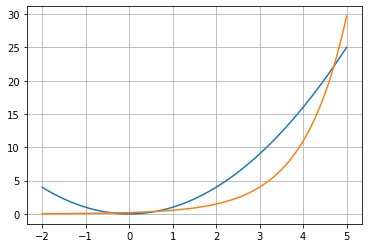

In [18]:
x = np.linspace(-2, 5, 10000)
plt.plot(x, x**2)
plt.plot(x, np.exp(x)/5)
plt.grid()

Для нелинейного уравнения 
$$x^2 - \frac{e^x}{5} = 0$$
составим метод простой итерации и докажем его сходимость.

Метод простой итерации в данном случае можно составить двумя способами:
$$x_{k + 1} = \pm \sqrt{\frac{e^x}{5}}$$
$$x_{k + 1} = \ln (5 x_k^2)$$

Достаточное условие сходимости метода простой итерации $x_{k+1} = \varphi(x_k)$:
$$|\varphi_x(\xi)'| < 1$$
где $\xi$ -- любое значение из области локализации.

Для нашего случая:
$$\varphi_x' = \frac{1}{2} \sqrt{\frac{e^x}{5}}$$
$$\psi_x' = \frac{2}{x}$$

Заметим, что для любого значения из области локализации корней $x_1$ и $x_2$ $|\varphi_x'| < 1$.
Для любого значения $\xi$ из области локализации корня $x_3$ выполнено $|\psi_x'| < 1$.

Таким образом, для уточнения корней $x_1$ и $x_2$ необходимо использовать 
$$x_{k + 1} = \pm \sqrt{\frac{e^x}{5}}$$
а для уточнения корня $x_3$ необходимо использовать 
$$x_{k + 1} = \ln (5 x_k^2)$$

In [19]:
def MSI1(initial_sol):
    steps = 0
    eps = 1e-3

    x_cur = initial_sol
    x_prev = 0

    while(abs(x_cur - x_prev) > eps):
        x_prev = x_cur
        steps+=1

        if initial_sol >= 0:
            x_cur = math.sqrt(math.exp(x_prev)/5)
        else:
            x_cur = - math.sqrt(math.exp(x_prev)/5)

    return x_cur, steps

def MSI2(initial_sol):
    steps = 0
    eps = 1e-3

    x_cur = initial_sol
    x_prev = 0

    while(abs(x_cur - x_prev) > eps):
        x_prev = x_cur
        steps+=1

        x_cur = math.log(5 * x_prev**2)

    return x_cur, steps

In [20]:
solution1, steps1 = MSI1(0.5)
print('The first solution by MSI %0.2f (achieved by %d steps)' %(solution1, steps1))
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [0.5])))

solution2, steps2 = MSI1(-0.5)
print('The second solution by MSI %0.2f (achieved by %d  steps)' %(solution2, steps2))
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [-0.5])))

solution3, steps3 = MSI2(4.5)
print('The second solution by MSI %0.2f (achieved by %d  steps)' %(solution3, steps3))
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [4.5])))

The first solution by MSI 0.61 (achieved by 5 steps)
Validate solution 0.61
The second solution by MSI -0.37 (achieved by 4  steps)
Validate solution -0.37
The second solution by MSI 4.71 (achieved by 7  steps)
Validate solution 4.71


Покажем наглядно, что бывает, если использовать метод простой итерации вне области его сходимости.

In [21]:
solution1, steps1 = MSI2(0.5)
print('The first solution by MSI %0.2f (achieved by %d steps)' %(solution1, steps1))
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [0.5])))

solution2, steps2 = MSI2(-0.5)
print('The second solution by MSI %0.2f (achieved by %d  steps)' %(solution2, steps2))
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [-0.5])))

solution3, steps3 = MSI1(4.5)
print('The second solution by MSI %0.2f (achieved by %d  steps)' %(solution3, steps3))
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [4.5])))

The first solution by MSI 4.71 (achieved by 14 steps)
Validate solution 0.61
The second solution by MSI 4.71 (achieved by 14  steps)
Validate solution -0.37
The second solution by MSI 0.61 (achieved by 12  steps)
Validate solution 4.71


Решим систему нелинейных уравнений 
$$
\begin{cases}
    \tg (xy + 0.4) - x^2 = 0 \\
    0.6 x^2 + 2 y^2 - 1 = 0 \\
\end{cases}
$$
методом Ньютона.

Общий вид метода Ньютона:

$$x_{k+1} = x_k - J^{-1} F(x_k)$$

где $x_k$ -- столбец решений, $J$ -- якобиан системы, $F = (f_1, f_2 , \dots, f_n)$ -- столбец функций системы.

Для нашей системы

$$F =
\begin{pmatrix}
    f_1 \\
    f_2 \\
\end{pmatrix} = 
\begin{pmatrix}
    \tg (xy + 0.4) - x^2 \\
    0.6 x^2 + 2 y^2 - 1 \\
\end{pmatrix}
$$

$$ J = 
\begin{pmatrix}
    \frac{\partial f_1}{\partial x} ~ \frac{\partial f_1}{\partial y} \\
    \frac{\partial f_2}{\partial x} ~ \frac{\partial f_2}{\partial y} \\
\end{pmatrix}
$$

$\frac{\partial f_1}{\partial x} = \frac{y}{\cos^2 (xy + 0.4)} - 2x$;
$\frac{\partial f_1}{\partial y} = \frac{y}{\cos^2 (xy + 0.4)}$;
$\frac{\partial f_2}{\partial x} = 1.2 x$;
$\frac{\partial f_2}{\partial y} = 4 y$;

Поскольку в данном случае $J$ -- матрица $2 \times 2$ найти обратную к ней нетрудно:

$$J^{-1} = \frac{1}{\det J}
\begin{pmatrix}
    \frac{\partial f_2}{\partial y} ~ \frac{- \partial f_1}{\partial y} \\
    \frac{- \partial f_2}{\partial x} ~ \frac{\partial f_1}{\partial x}
\end{pmatrix}
$$

где $\det J$ -- детерминант матрицы

$$\det J = \frac{\partial f_1}{\partial x} \frac{\partial f_2}{\partial y} - \frac{\partial f_1}{\partial y} \frac{\partial f_2}{\partial x}$$

In [22]:
# Поскольку мы работаем с конктретной системой нелинейных уравнений, а програмное нахождение
# частных поизводных накладывает большую вычислительную ошибку,
# в данном конкретном случае будет выгоднее захардкодить все математичсекие выражения
# вместо того, чтобы писать в общем виде

# The set of equations
F = {}
F['f1'] = lambda x, y : np.tan(x*y + 0.4) - x**2
F['f2'] = lambda x, y : 0.6 * x**2 + 2 * y**2 - 1

Локализуем корни уравнения, используя графический метод. По графику можно качественно определить 
положение корней с точностью до 1 знака после запятой.

$$x_1 \in (1, 1.1)     ~~ y_1 \in (0.3, 0.5)$$
$$x_2 \in (0.3, 0.5)   ~~ y_2 \in (-0.6, -0.8)$$
$$x_3 \in (-1, -1.1)   ~~ y_3 \in (-0.3, -0.5)$$
$$x_4 \in (-0.3, -0.5) ~~ y_4 \in (0.5, 0.7)$$

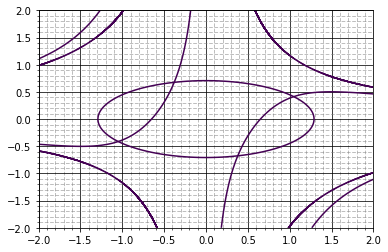

In [23]:
# ATTENTION
# This cell may take a long time to execute
# or it can lead to some errors with kernal
# in this case just rerun all cells or just this cell again

xrange = np.linspace(-2, 2, 10000)
yrange = np.linspace(-2, 2, 10000)
X, Y = np.meshgrid(xrange, yrange)
f1 = F['f1'](X,Y) 
f2 = F['f2'](X, Y)
plt.contour(X, Y, f1, [0])
plt.contour(X, Y, f2, [0])
plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

In [24]:
J = {}
J['df1x'] = lambda x, y : y / (np.cos(x*y + 0.4)**2) - 2*x
J['df1y'] = lambda x, y : y / (np.cos(x*y + 0.4)**2)
J['df2x'] = lambda x, y : 1.2*x
J['df2y'] = lambda x, y : 4*x

# return the value
# it's need to give x and y, cause the multiplication of functions is unsupported operation
def det_J(J, x, y):
    return J['df1x'](x, y) * J['df2y'](x, y) - J['df1y'](x, y) * J['df2x'](x, y)

In [25]:
def Newtons_M(init_x, init_y):
    steps = 0
    eps = 1e-3

    x_cur = init_x
    y_cur = init_y
    x_prev = 0
    y_prev = 0

    while((abs(x_cur - x_prev) > eps) or (abs(y_cur - y_prev) > eps)):
        x_prev = x_cur
        y_prev = y_cur
        steps+=1

        x_cur = x_prev - (1 / det_J(J, x_prev, y_prev)) * (J['df2y'](x_prev, y_prev) * F['f1'](x_prev, y_prev) - J['df1y'](x_prev, y_prev) * F['f2'](x_prev, y_prev))
        y_cur = y_prev - (1 / det_J(J, x_prev, y_prev)) * (- J['df2x'](x_prev, y_prev) * F['f1'](x_prev, y_prev) + J['df1x'](x_prev, y_prev) * F['f2'](x_prev, y_prev))

    return x_cur, y_cur, steps

In [26]:
# Note: as in Newton's method we divide by det J, we can not use initial x = 0 (devision by zero)

x1, y1, steps1 = Newtons_M(1.05, 0.4)
x3, y3, steps3 = Newtons_M(-1.05, -0.4)

print('The first solution (%0.2f, %0.2f), achieved by %d steps' %(x1, y1, steps1))
print('The third solution (%0.2f, %0.2f), achieved by %d steps' %(x3, y3, steps3))

The first solution (1.05, 0.41), achieved by 4 steps
The third solution (-1.05, -0.41), achieved by 4 steps


Полученный метод имеет область сходимости. Так, при поиске 2 и 4 корней, метод начинает расходиться и происходит переполнение.

In [27]:
x2, y2, steps2 = Newtons_M(0.4, -0.7)
x4, y4, steps4 = Newtons_M(-0.4, -0.6)

print('The second solution (%0.2f, %0.2f), achieved by %d' %(x2, y2, steps2))
print('The 4th solution (%0.2f, %0.2f), achieved by %d' %(x4, y4, steps4))

The second solution (nan, nan), achieved by 307
The 4th solution (nan, nan), achieved by 315


/tmp/ipykernel_115001/3141661888.py:15: RuntimeWarning: overflow encountered in double_scalars
  x_cur = x_prev - (1 / det_J(J, x_prev, y_prev)) * (J['df2y'](x_prev, y_prev) * F['f1'](x_prev, y_prev) - J['df1y'](x_prev, y_prev) * F['f2'](x_prev, y_prev))
/tmp/ipykernel_115001/3141661888.py:16: RuntimeWarning: overflow encountered in double_scalars
  y_cur = y_prev - (1 / det_J(J, x_prev, y_prev)) * (- J['df2x'](x_prev, y_prev) * F['f1'](x_prev, y_prev) + J['df1x'](x_prev, y_prev) * F['f2'](x_prev, y_prev))
/tmp/ipykernel_115001/2358461412.py:2: RuntimeWarning: invalid value encountered in cos
  J['df1x'] = lambda x, y : y / (np.cos(x*y + 0.4)**2) - 2*x
/tmp/ipykernel_115001/2358461412.py:3: RuntimeWarning: invalid value encountered in cos
  J['df1y'] = lambda x, y : y / (np.cos(x*y + 0.4)**2)
/tmp/ipykernel_115001/1705744133.py:8: RuntimeWarning: invalid value encountered in tan
  F['f1'] = lambda x, y : np.tan(x*y + 0.4) - x**2


## Вывод

Как мы увидели из данной работы, метод простой итерации для решения нелинейных уранвений почти всегда
требует индивидуального подхода, так как необходимо не только составить метод на основе данного
уравнения (а это можно сделать несколькими способами), но и выбрать сходящийся в рабочей области вариант.

Применение численных методов решения вне области их сходимости может привести к чудовищным ошибкам.

Локализация корней -- важный этап решения нелинейных уравнений. Использование одного метода локализации
может оказаться недостаточным. Данный шаг требует комплексного подхода (например графический метод в 
совокупности с исследованием функции методами математического анализа).

Метод Ньютона для решения систем нелинейных уравнений является быстросходяшимся (это можно видеть по 
количеству итераций, за которое была достигнута заданная точность). Так же, мы убедились, что не все
корни системы могут быть найдены таким способом, так как метод имеет область сходимости.